In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)

## Detect an object by color and frame it with a rectangle using a webcam

![tracked_red_object](https://media.giphy.com/media/nRMNBsprKN0zLpaiHO/giphy-downsized-large.gif "tracked red object")

In [ ]:
video = cv2.VideoCapture(1)

while(video.isOpened()):
    check, frame = video.read()
    if frame is not None:
        lower_range1 = (160, 50, 150)
        upper_range1 = (188, 255, 255)
        img = frame
        # converting image into HSV color space as opencv reads image in BGR color model by default
        hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        # getting the mask image from the HSV image using threshold values
        mask = cv2.inRange(hsv_frame, (lower_range1), (upper_range1))
        # extracting the contours of the object
        contours,_ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
        # sorting the contour based of area
        contours = sorted(contours, key=cv2.contourArea, reverse=True)

        if contours:
            # if any contours are found we take the biggest contour and get bounding box
            (x_min, y_min, box_width, box_height) = cv2.boundingRect(contours[0])
            # drawing a rectangle around the object with 15 pixels as margin
            cv2.rectangle(frame, (x_min - 15, y_min -15),
                          (x_min + box_width + 15, y_min + box_height + 15),
                          (0,255,0), 4)
                
        cv2.imshow('frame',frame)        
        if cv2.waitKey(30) & 0xFF == ord('q'):
            break
    else:
        break


video.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

## Given an image with a ball on it isolate the ball by its color

ipykernel_launcher:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


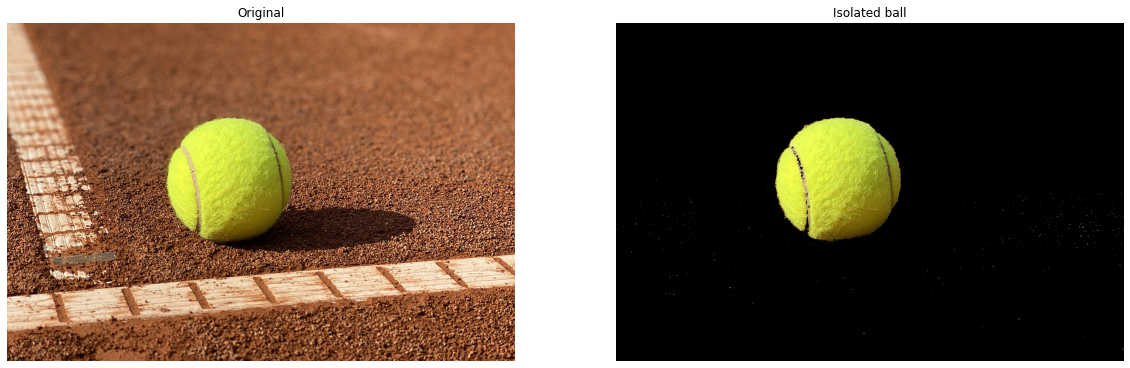

In [2]:
ball = cv2.imread("./img/tennis_ball.jpg")
hsv_ball = cv2.cvtColor(ball, cv2.COLOR_BGR2HSV)

lower_range1 = (20, 85, 0)
upper_range1 = (40, 255, 255)

mask = cv2.inRange(hsv_ball, lower_range1, upper_range1)

ball_iso = ball.copy()

ball_iso[mask == 0] = [0,0,0]

fig = plt.figure(figsize=(20, 13)) 
rows = 1
columns = 2
  
# Adds a subplot at the 1st position 
fig.add_subplot(rows, columns, 1) 
plt.imshow(cv2.cvtColor(ball ,cv2.COLOR_BGR2RGB)) 
plt.axis('off') 
plt.title("Original") 
  
# Adds a subplot at the 2nd position 
fig.add_subplot(rows, columns, 2) 
plt.imshow(cv2.cvtColor(ball_iso ,cv2.COLOR_BGR2RGB)) 
plt.axis('off') 
plt.title("Isolated ball") 

fig.show();